In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
df = pd.read_csv('data11_filtered.csv')

In [3]:
df.head()

,Unnamed: 0,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,0,7,2007,ALB,AUT,0,812.9,0,0.0,"10,701,012.0",...,1,1,5,8,40,4404946520,0.3,"38,736.0",0.0,-0.0
1,4,11,2007,ALB,DEU,0,"1,493.1",0,0.0,"10,701,012.0",...,1,1,5,8,276,38729776000,0.3,"1,000.0",0.0,-0.0
2,5,12,2007,ALB,GRC,1,500.1,0,0.0,"10,701,012.0",...,1,1,5,8,300,4411954035,0.3,"11,904.0",0.0,-0.0
3,7,14,2007,ALB,ITA,0,611.8,0,0.0,"10,701,012.0",...,1,1,5,8,381,15399984966,0.3,"7,921.0",0.0,-0.0
4,11,19,2007,DZA,CAN,0,"6,747.0",1,0.0,"134,977,871.9",...,0,0,6,12,124,10123052238,0.1,"1,830.0",0.0,-0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'X', 'year', 'iso3_o', 'iso3_d', 'contig', 'dist',
       'comlang_off', 'comrelig', 'gdp_o', 'gdp_d', 'gatt_o', 'gatt_d',
       'wto_o', 'wto_d', 'eu_o', 'eu_d', 'rta', 'rta_coverage', 'rta_type',
       'iso3num_o_y', 'iso3num_d_y', 'destTotImp', 'HHI_value', 'tr_flows',
       'MS', 'olig_cor'],
      dtype='object')

In [5]:
df['gravity_controls'] = (df['rta'] + df['contig'] + df['comlang_off']) * (-4)

In [6]:
df.drop(['year',
         'rta_type',
         'Unnamed: 0',
         'X',
         'gatt_o',
         'gatt_d',
         'rta_coverage',
         'iso3num_d_y',
         'iso3num_o_y',
         'comrelig',
         'wto_o',
         'wto_d',
         'eu_o',
         'eu_d',
         'destTotImp',
         'HHI_value',
         'MS',
         'rta',
         'contig',
         'comlang_off'], 
         axis =1, 
         inplace = True)

In [7]:
df.columns

Index(['iso3_o', 'iso3_d', 'dist', 'gdp_o', 'gdp_d', 'tr_flows', 'olig_cor',
       'gravity_controls'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58291 entries, 0 to 58290
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iso3_o            58291 non-null  object 
 1   iso3_d            58291 non-null  object 
 2   dist              58291 non-null  float64
 3   gdp_o             58291 non-null  float64
 4   gdp_d             58291 non-null  float64
 5   tr_flows          58291 non-null  float64
 6   olig_cor          58291 non-null  float64
 7   gravity_controls  58291 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.6+ MB


In [9]:
df.describe()

,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
count,"58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0"
mean,"6,484.1","1,262,130,058.0","693,347,907.8","67,302,980.2",-0.0,-2.3
std,"4,560.9","2,650,747,547.7","2,006,367,757.8","428,505,446.2",0.0,2.8
min,59.6,"318,522.3","123,005.1",1.0,-0.9,-12.0
25%,"2,348.9","139,439,620.1","19,479,013.4","116,426.0",-0.0,-4.0
50%,"5,982.6","341,497,937.9","102,292,258.8","1,302,343.0",-0.0,0.0
75%,"9,452.8","1,299,051,970.6","429,097,877.5","11,608,104.5",-0.0,0.0
max,"19,812.0","18,036,648,050.7","18,036,648,050.7","17,999,129,185.0",-0.0,0.0


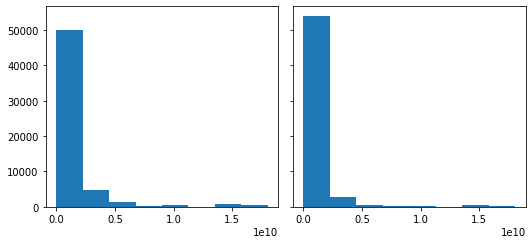

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(df['gdp_o'], bins=8)
axs[1].hist(df['gdp_d'], bins=8)
plt.show()

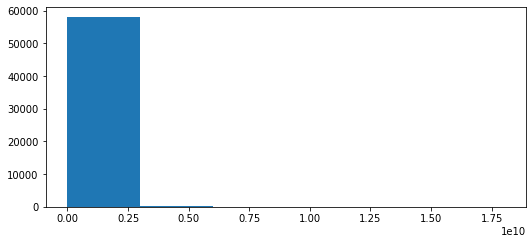

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(df['tr_flows'], bins=6)

plt.show()

In [12]:
df_modified = df.copy(deep=True)

In [13]:
df_modified['gdp_d_mln'] = df_modified['gdp_d']/1000000

In [14]:
df_modified['gdp_o_mln'] = df_modified['gdp_o']/1000000

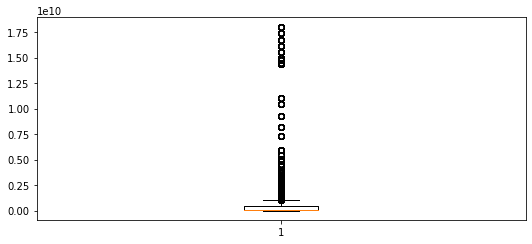

In [15]:
plt.boxplot(df['gdp_d'])
plt.show()

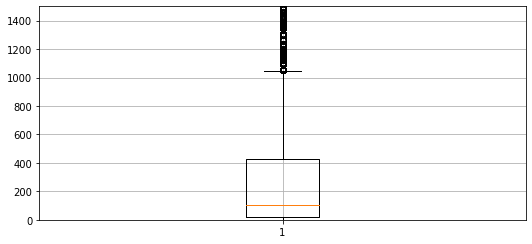

In [16]:
plt.ylim(0, 1500)
plt.boxplot(df_modified['gdp_d_mln'])
plt.grid()
plt.show()

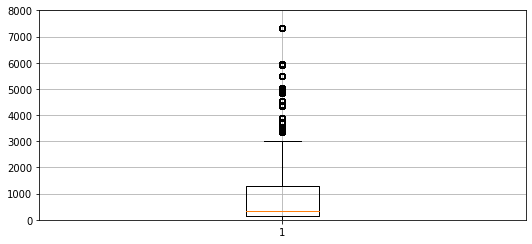

In [17]:
plt.ylim(0, 8000)
plt.boxplot(df_modified['gdp_o_mln'])
plt.grid()
plt.show()

In [18]:
df['gdp_d'].describe()

count           58,291.0
mean       693,347,907.8
std      2,006,367,757.8
min            123,005.1
25%         19,479,013.4
50%        102,292,258.8
75%        429,097,877.5
max     18,036,648,050.7
Name: gdp_d, dtype: float64

In [19]:
df['gdp_d'].quantile([0.8,0.85, 0.90])

0.8     579,680,010.2
0.8   1,094,499,369.0
0.9   1,778,632,097.8
Name: gdp_d, dtype: float64

In [20]:
df[df['gdp_d'] >500000000]

,iso3_o,iso3_d,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
1,ALB,DEU,"1,493.1","10,701,012.0","3,435,506,696.2","1,000.0",-0.0,-4
3,ALB,ITA,611.8,"10,701,012.0","2,203,972,534.3","7,921.0",-0.0,-4
4,DZA,CAN,"6,747.0","134,977,871.9","1,457,872,830.5","1,830.0",-0.0,-4
6,DZA,FRA,"1,340.4","134,977,871.9","2,662,975,930.4","1,069,737.0",-0.0,-8
7,DZA,ITA,991.1,"134,977,871.9","2,203,972,534.3","2,476.0",-0.0,-4
...,...,...,...,...,...,...,...,...
58277,URY,TUR,"12,115.1","53,274,304.5","859,383,660.5","170,879.0",-0.0,-4
58278,URY,GBR,"11,057.9","53,274,304.5","2,861,090,734.1","20,995.0",-0.0,0
58279,URY,USA,"8,617.4","53,274,304.5","18,036,648,050.7","17,547,924.0",-0.0,0
58281,WSM,AUS,"3,050.8","803,976.5","1,345,383,170.0","3,053.0",-0.0,-8


In [21]:
df[df['gdp_d'] <500000000]

,iso3_o,iso3_d,dist,gdp_o,gdp_d,tr_flows,olig_cor,gravity_controls
0,ALB,AUT,812.9,"10,701,012.0","386,439,118.8","38,736.0",-0.0,-4
2,ALB,GRC,500.1,"10,701,012.0","318,668,275.7","11,904.0",-0.0,-8
5,DZA,DOM,"7,288.8","134,977,871.9","44,078,280.7","38,400.0",-0.0,0
8,DZA,CIV,"3,579.9","134,977,871.9","20,343,636.0","60,113.0",-0.0,-4
9,DZA,JOR,"3,057.6","134,977,871.9","17,110,609.9","1,553.0",-0.0,-4
...,...,...,...,...,...,...,...,...
58286,ZMB,BWA,"1,061.9","21,154,394.1","14,430,608.4","20,668.0",-0.0,-12
58287,ZMB,MWI,620.3,"21,154,394.1","6,373,201.4","55,007.0",-0.0,-12
58288,ZMB,NAM,"1,415.0","21,154,394.1","11,491,507.2","4,346.0",-0.0,-12
58289,ZMB,ZAF,"2,278.6","21,154,394.1","317,406,609.4","49,001.0",-0.0,-8


<AxesSubplot:>

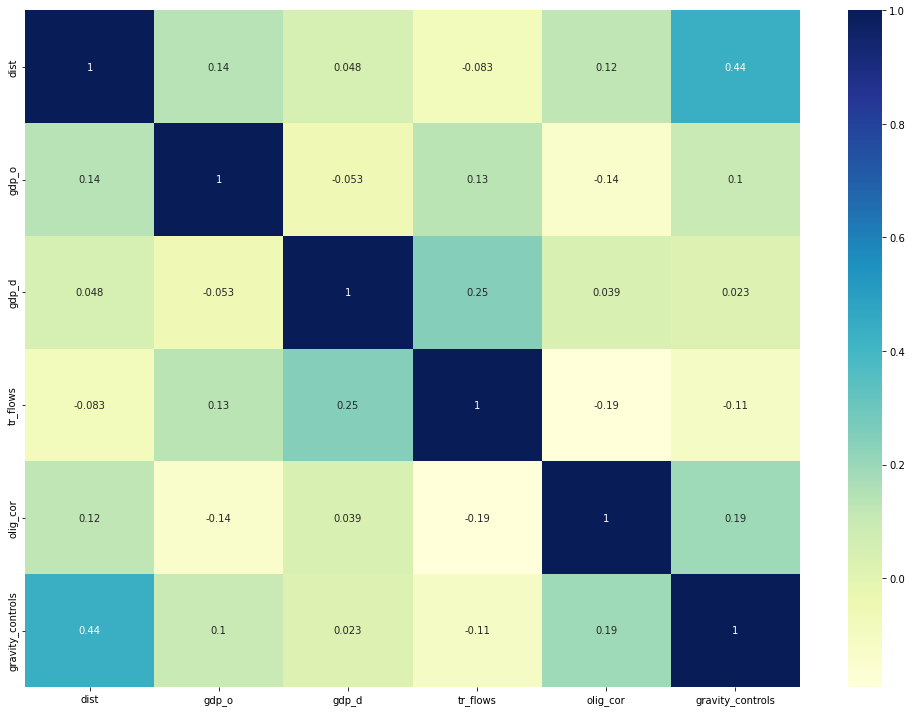

In [22]:
corr_pic = df.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_pic, annot=True, ax = ax,cmap="YlGnBu")

Значение корреляции интерпритируются следующим образом: 

|Значение          |Интерпретация |
|:-----------------|-------------:|
|от 0 до 0,3	   |очень слабая  |
|от 0,3 до 0,5     |слабая        |
|от 0, 5 до 0,7    |средняя       |
|от 0,7 до 0, 9    |высокая       |
|от 0,9 до 1       |очень высокая |


In [23]:
df_regression = df[['iso3_o','iso3_d','tr_flows','olig_cor','gravity_controls']]

In [32]:
df_transformed = pd.get_dummies(df_regression, drop_first=True)

In [33]:
numeric = ['tr_flows']

In [34]:
scaler = StandardScaler()
scaler.fit(df_transformed[numeric])
df_transformed[numeric] = scaler.transform(df_transformed[numeric])

In [35]:
features = df_transformed.drop(['tr_flows'], axis=1)
target = df_transformed['tr_flows']

In [36]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [37]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.3283855119608467
model RMSE:  0.66412711193621
predicted mean:  -0.0004735888157158532


In [38]:
feature_names = [col for col in list(features.columns)]

In [39]:
eli5.explain_weights(model,top = 50, feature_names = feature_names)

Weight?,Feature
+2.366,iso3_d_USA
+1.517,iso3_d_BEL
+1.412,iso3_d_DEU
+1.182,iso3_o_DEU
+1.033,iso3_d_GBR
+0.996,iso3_d_JPN
+0.970,iso3_d_ITA
+0.970,iso3_d_FRA
+0.909,iso3_d_CHE
+0.886,iso3_d_NLD
